In [301]:
import pandas as pd
import numpy as np

In [302]:
df=pd.read_csv('housePrice.csv')

In [303]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [305]:
df[df.duplicated(keep=False)].value_counts().reset_index(name="count")

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),count
0,75,2,True,True,False,Shahr-e-Ziba,1.890000e+09,63000.00,14
1,57,1,True,True,True,Ostad Moein,1.600000e+09,53333.33,5
2,180,3,True,True,True,Pasdaran,9.900000e+09,330000.00,4
3,87,2,True,True,True,Pardis,6.500000e+08,21666.67,4
4,68,2,True,True,True,Ostad Moein,1.970000e+09,65666.67,4
...,...,...,...,...,...,...,...,...,...
156,120,3,True,True,True,Ostad Moein,3.950000e+09,131666.67,2
157,40,0,False,False,False,Pakdasht,1.650000e+08,5500.00,2
158,320,4,True,True,True,Saadat Abad,4.000000e+10,1333333.33,2
159,235,3,True,True,True,Gheitarieh,2.400000e+10,800000.00,2


In [306]:
df_unique=df.drop_duplicates()

In [307]:
df_unique

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3473,63,1,True,True,False,Feiz Garden,1.890000e+09,63000.00
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [308]:
df_unique.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [309]:
df_unique_cleaned=df_unique.dropna(subset=['Address'])

In [310]:
df_unique_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3248 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3248 non-null   object 
 1   Room        3248 non-null   int64  
 2   Parking     3248 non-null   bool   
 3   Warehouse   3248 non-null   bool   
 4   Elevator    3248 non-null   bool   
 5   Address     3248 non-null   object 
 6   Price       3248 non-null   float64
 7   Price(USD)  3248 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 161.8+ KB


In [311]:
df_unique_cleaned.describe()

,Room,Price,Price(USD)
count,3248.000000,3.248000e+03,3.248000e+03
mean,2.088054,5.478118e+09,1.826039e+05
std,0.764716,8.267916e+09,2.755972e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.420000e+09,4.733333e+04
50%,2.000000,2.977500e+09,9.925000e+04
75%,2.000000,6.200000e+09,2.066667e+05
max,5.000000,9.240000e+10,3.080000e+06


In [312]:
import matplotlib.pyplot as plt
import seaborn as sns

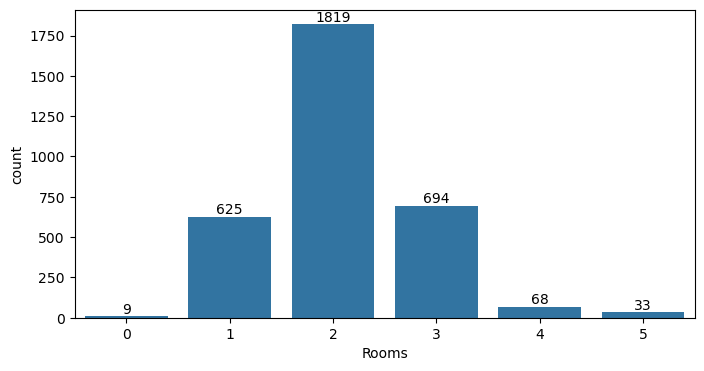

In [313]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x=df_unique_cleaned['Room'])

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Rooms')
plt.show()


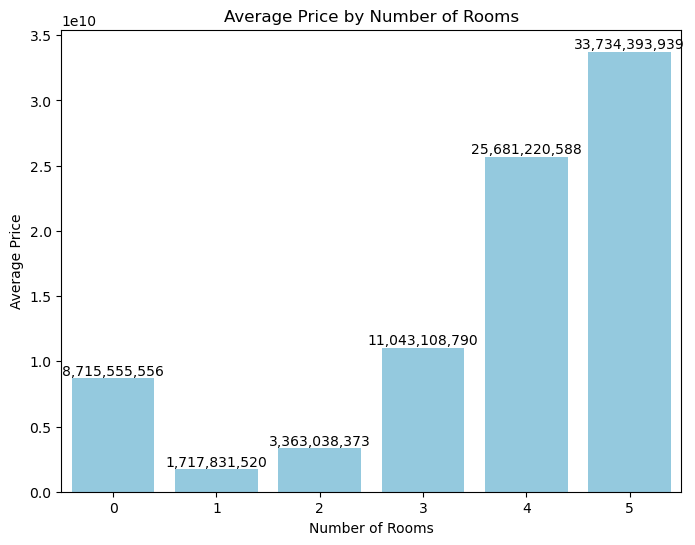

In [314]:
mean_price_by_room=df_unique_cleaned.groupby('Room')['Price'].mean().reset_index()
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Room' , y='Price' , data=mean_price_by_room , color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Average Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [315]:
df_unique_cleaned[df_unique_cleaned['Room']==0]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
103,40,0,False,False,False,Shahrake Qods,2.480000e+08,8266.67
137,40,0,False,False,False,Pakdasht,1.650000e+08,5500.00
1169,40,0,False,True,False,Ostad Moein,6.500000e+08,21666.67
2103,43,0,False,True,False,Nasim Shahr,3.600000e+08,12000.00
2625,50,0,True,True,True,Northern Chitgar,3.450000e+08,11500.00
2721,110,0,True,True,True,Parand,1.020000e+08,3400.00
3107,630,0,False,False,False,Tajrish,7.560000e+10,2520000.00
3211,30,0,False,True,False,Ostad Moein,5.000000e+08,16666.67
3435,54,0,False,False,False,Shahrake Qods,4.700000e+08,15666.67


In [316]:
#Removing index 3107 due to an outlier in Room 0
df_unique_cleaned.drop(index=3107 , inplace=True)

C:\Users\sepideh\AppData\Local\Temp\ipykernel_11392\1257320370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_cleaned.drop(index=3107 , inplace=True)


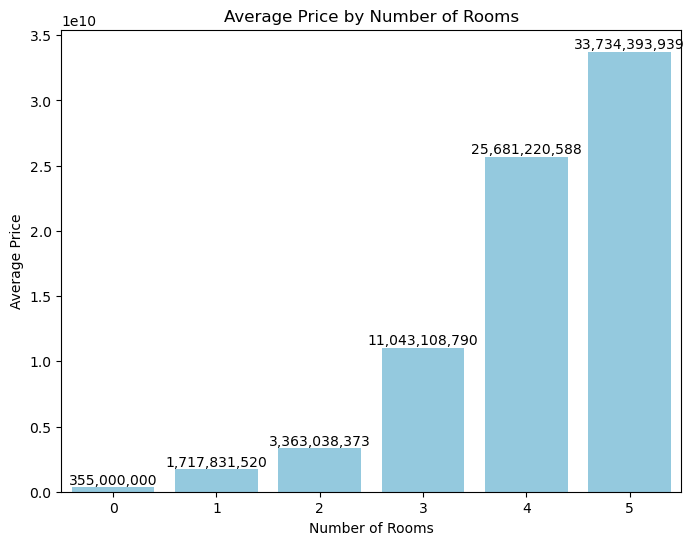

In [317]:
mean_price_by_room=df_unique_cleaned.groupby('Room')['Price'].mean().reset_index()
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Room' , y='Price' , data=mean_price_by_room , color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Average Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

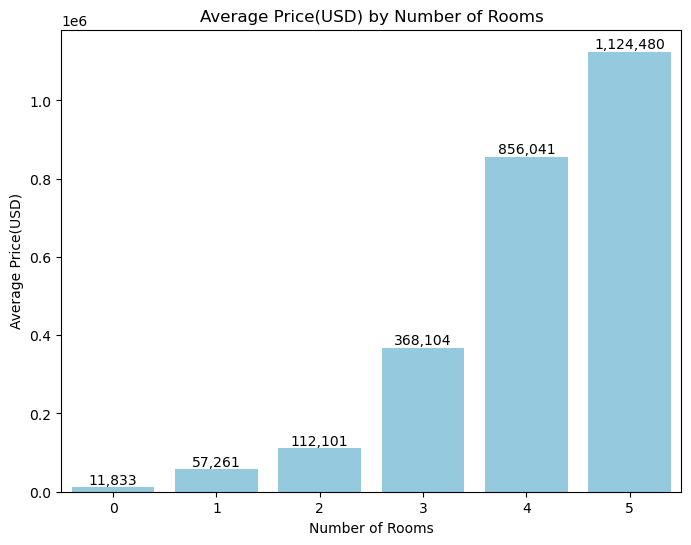

In [318]:
mean_Price_USD_room=df_unique_cleaned.groupby('Room')['Price(USD)'].mean().reset_index()
plt.figure(figsize=(8,6))
ax=sns.barplot(x='Room' , y='Price(USD)' , data=mean_Price_USD_room , color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), textcoords='offset points')
plt.title('Average Price(USD) by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Average Price(USD)')
plt.xticks(rotation=0)
plt.show()

In [319]:
mean_price_by_Address=df_unique_cleaned.groupby('Address')['Price'].mean().reset_index()
mean_price_by_Address=mean_price_by_Address.sort_values(by='Price' , ascending=False)
mean_price_by_Address['Formatted Price']=mean_price_by_Address['Price'].apply(lambda x: f'{x:,.0f}')
mean_price_by_Address[['Address', 'Formatted Price']]

,Address,Formatted Price
55,Gandhi,"70,000,000,000"
87,Lavasan,"48,000,000,000"
90,Mahmoudieh,"33,466,666,667"
177,Vanak,"32,700,000,000"
44,Elahieh,"26,786,352,941"
...,...,...
66,Hassan Abad,"510,000,000"
53,Firoozkooh,"470,000,000"
121,Pishva,"340,000,000"
133,Robat Karim,"327,500,000"


In [320]:
df_unique_cleaned['Area'].unique()

array(['63', '60', '79', '95', '123', '70', '87', '59', '54', '71', '68',
       '64', '136', '155', '140', '42', '93', '65', '99', '105', '160',
       '77', '110', '100', '90', '49', '96', '67', '62', '55', '129',
       '109', '58', '150', '130', '88', '51', '113', '98', '75', '61',
       '72', '122', '215', '101', '53', '74', '114', '151', '300', '76',
       '148', '40', '128', '94', '97', '137', '85', '78', '48', '82',
       '120', '139', '66', '80', '44', '50', '121', '141', '127', '180',
       '158', '144', '245', '190', '108', '117', '200', '125', '236',
       '220', '86', '84', '106', '320', '154', '210', '124', '83', '270',
       '104', '103', '165', '135', '132', '81', '153', '166', '175',
       '170', '115', '118', '116', '43', '230', '91', '126', '450', '500',
       '145', '112', '192', '164', '265', '92', '143', '350', '335',
       '235', '225', '221', '312', '188', '198', '650', '179', '256',
       '257', '167', '246', '168', '280', '69', '400', '660', '213', '

In [321]:
df_unique_cleaned['Area']=df_unique_cleaned['Area'].str.replace(',', '').str.strip()
df_unique_cleaned['Area']=pd.to_numeric(df_unique_cleaned['Area']).astype('int64')
df_unique_cleaned=df_unique_cleaned[df_unique_cleaned['Area']<10000]

C:\Users\sepideh\AppData\Local\Temp\ipykernel_11392\4090932708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_cleaned['Area']=df_unique_cleaned['Area'].str.replace(',', '').str.strip()
C:\Users\sepideh\AppData\Local\Temp\ipykernel_11392\4090932708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_cleaned['Area']=pd.to_numeric(df_unique_cleaned['Area']).astype('int64')


In [322]:
df_unique_cleaned['Area'].describe()

count    3243.000000
mean      108.892075
std        94.616470
min        30.000000
25%        70.000000
50%        90.000000
75%       121.500000
max      3600.000000
Name: Area, dtype: float64

In [323]:
df_unique_cleaned.to_excel('housePrice_cleaned.xlsx' , index=False)

In [324]:
df_unique_cleaned=pd.get_dummies(df_unique_cleaned , columns=['Address'], drop_first=True)

In [325]:
df_unique_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 0 to 3478
Columns: 198 entries, Area to Address_Zibadasht
dtypes: bool(194), float64(2), int64(2)
memory usage: 741.1 KB


In [326]:
df_unique_cleaned_encoded=df_unique_cleaned.applymap(lambda x: 1 if x==True else (0 if x == False else x))

C:\Users\sepideh\AppData\Local\Temp\ipykernel_11392\737082143.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_unique_cleaned_encoded=df_unique_cleaned.applymap(lambda x: 1 if x==True else (0 if x == False else x))


In [327]:
df_unique_cleaned_encoded.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_Waterfall,Address_West Ferdows Boulevard,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht
0,63,1,1,1,1,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,5.500000e+08,18333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,9.025000e+08,30083.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,7.000000e+09,233333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [328]:
df_unique_cleaned_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 0 to 3478
Columns: 198 entries, Area to Address_Zibadasht
dtypes: float64(2), int64(196)
memory usage: 4.9 MB


In [329]:
price_corr = df_unique_cleaned_encoded.corr()["Price"]
sorted_price_corr = price_corr.drop(["Price", "Price(USD)"]).sort_values(ascending=False)
sorted_price_corr

Room                     0.583998
Area                     0.538369
Address_Niavaran         0.255856
Address_Farmanieh        0.246565
Address_Zaferanieh       0.203028
                           ...   
Address_Andisheh        -0.070119
Address_Jeyhoon         -0.076535
Address_Shahrake Qods   -0.080412
Address_Pardis          -0.113138
Address_Parand          -0.117361
Name: Price, Length: 196, dtype: float64

In [330]:
def categorize_rooms(room):
    if room <= 2:
        return 0  
    elif 3 <= room <= 4:
        return 1 
    else:
        return 2 

df_unique_cleaned_encoded['Room_Category'] = df_unique_cleaned_encoded['Room'].apply(categorize_rooms)

df_unique_cleaned_encoded['Room_Parking_Impact'] = df_unique_cleaned_encoded['Room'] * (df_unique_cleaned_encoded['Parking'] + 1)
df_unique_cleaned_encoded.head()


,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_Abbasabad,Address_Absard,Address_Abuzar,...,Address_West Pars,Address_Yaftabad,Address_Yakhchiabad,Address_Yousef Abad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,Room_Category,Room_Parking_Impact
0,63,1,1,1,1,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,60,1,1,1,1,1.850000e+09,61666.67,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,79,2,1,1,1,5.500000e+08,18333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,95,2,1,1,1,9.025000e+08,30083.33,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,123,2,1,1,1,7.000000e+09,233333.33,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [331]:
price_corr = df_unique_cleaned_encoded.corr()["Price"]
sorted_price_corr = price_corr.drop(["Price"]).sort_values(ascending=False)
sorted_price_corr

Price(USD)               1.000000
Room_Category            0.584558
Room                     0.583998
Room_Parking_Impact      0.581944
Area                     0.538369
                           ...   
Address_Andisheh        -0.070119
Address_Jeyhoon         -0.076535
Address_Shahrake Qods   -0.080412
Address_Pardis          -0.113138
Address_Parand          -0.117361
Name: Price, Length: 199, dtype: float64

In [332]:
df_unique_cleaned_encoded.drop(columns='Price(USD)' , inplace=True)
x=df_unique_cleaned_encoded.drop(columns='Price')
y=df_unique_cleaned_encoded['Price']

In [334]:
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

param_grid = {
    'n_estimators': [200, 400, 600],
    'max_depth': [8, 12, 16], 
    'max_features': [0.3, 0.5, 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
rf = RandomForestRegressor(bootstrap=True, random_state=123)

grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("best parameters :", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

train_score = best_rf.score(x_train, y_train)
test_score = best_rf.score(x_test, y_test)
print(f"Accuracy Train (R²): {train_score:.4f}")
print(f"Accuracy Test (R²): {test_score:.4f}")

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f"Train MAE: {train_mae:.4f}")
print(f"Test MAE: {test_mae:.4f}")

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")



Fitting 3 folds for each of 243 candidates, totalling 729 fits
best parameters : {'max_depth': 16, 'max_features': 0.3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 600}
Accuracy Train (R²): 0.8570
Accuracy Test (R²): 0.8453
Train MAE: 1389167761.0722
Test MAE: 1367847619.8504
Train RMSE: 3190001421.4032
Test RMSE: 2773291892.2801
